In [1]:
#Load Libeary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import buildin dataset
from sklearn import datasets
# import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()


In [32]:
# Print dataset summary (description)
print(iris.DESCR) 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [33]:
# Convert to DataFrame for better readability
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [34]:
# Display first 5 rows
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [35]:
# Show statistical summary of the dataset
print(df.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


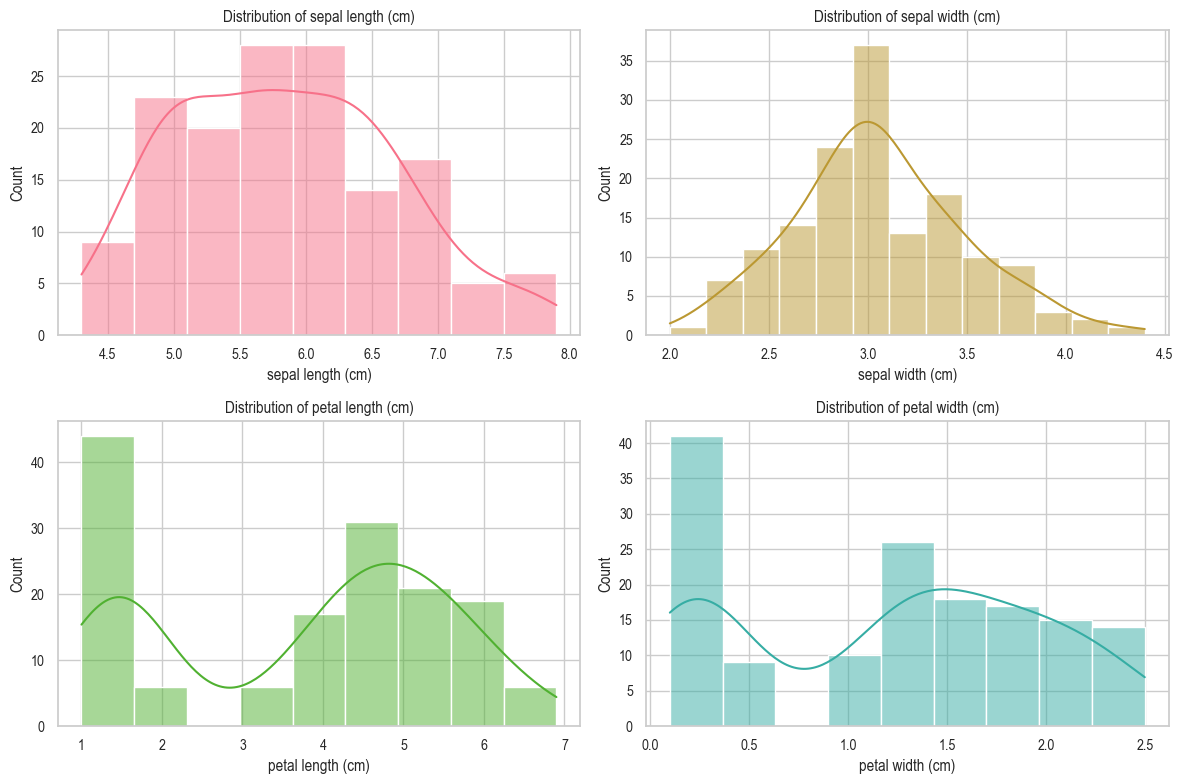

In [36]:

# Set the style of seaborn
sns.set(style="whitegrid")

# Create separate distribution plots
plt.figure(figsize=(12, 8))

for i, col in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)  # 2x2 grid of plots
    sns.histplot(df[col], kde=True, color=sns.color_palette("husl")[i-1])
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


In [37]:
# Store feature values in X
X = iris.data
print("\nFeature Data (X):\n", X[:5])  # Display first 5 rows of features


Feature Data (X):
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [38]:
# 1. Min-Max Scaling (0 to 1)
min_max = MinMaxScaler()
X_min_max = min_max.fit_transform(X)
print("Min-Max Scaling:\n", X_min_max[:5])  # Show first 5 rows

Min-Max Scaling:
 [[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


In [39]:
# 2. Standard Scaling (Mean 0, Std 1)
standard = StandardScaler()
X_standard = standard.fit_transform(X)
print("\nStandard Scaling:\n", X_standard[:5])


Standard Scaling:
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [40]:
# 3. Max Abs Scaling (Divides by largest value)
max_abs = MaxAbsScaler()
X_max_abs = max_abs.fit_transform(X)
print("\nMax Abs Scaling:\n", X_max_abs[:5])


Max Abs Scaling:
 [[0.64556962 0.79545455 0.20289855 0.08      ]
 [0.62025316 0.68181818 0.20289855 0.08      ]
 [0.59493671 0.72727273 0.1884058  0.08      ]
 [0.58227848 0.70454545 0.2173913  0.08      ]
 [0.63291139 0.81818182 0.20289855 0.08      ]]


In [41]:
# 4. Robust Scaling (Uses median, ignores outliers)
robust = RobustScaler()
X_robust = robust.fit_transform(X)
print("\nRobust Scaling:\n", X_robust[:5])


Robust Scaling:
 [[-0.53846154  1.         -0.84285714 -0.73333333]
 [-0.69230769  0.         -0.84285714 -0.73333333]
 [-0.84615385  0.4        -0.87142857 -0.73333333]
 [-0.92307692  0.2        -0.81428571 -0.73333333]
 [-0.61538462  1.2        -0.84285714 -0.73333333]]


In [42]:
# Apply Log Transformation
X_log = np.log1p(X)  # log1p = log(x + 1) to handle zero values
print("\nRobust Scaling:\n", X_log[:5])


Robust Scaling:
 [[1.80828877 1.5040774  0.87546874 0.18232156]
 [1.77495235 1.38629436 0.87546874 0.18232156]
 [1.74046617 1.43508453 0.83290912 0.18232156]
 [1.7227666  1.41098697 0.91629073 0.18232156]
 [1.79175947 1.5260563  0.87546874 0.18232156]]
